In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam

In [2]:
x = tf.Variable(tf.random.uniform(shape=[5,2],minval=0, maxval=1, dtype=tf.float32, seed=10))
x = tf.Variable(tf.concat([x, tf.ones([5, 1], tf.float32)], 1))
w = tf.Variable(tf.random.uniform(shape=[3,4], maxval=5, dtype=tf.float32, seed=10))
y = tf.random.uniform(shape=[5,4],minval=0, maxval=5, dtype=tf.float32, seed=10)
y

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1.4539415 , 2.6689136 , 3.1639237 , 4.3464684 ],
       [2.7829325 , 0.71489453, 0.54931164, 0.23130536],
       [2.0940895 , 2.1607451 , 0.7701415 , 1.6868669 ],
       [2.8299832 , 4.3040266 , 0.20386755, 2.3473625 ],
       [1.8008673 , 1.6849232 , 1.9028157 , 0.49446523]], dtype=float32)>

In [3]:
y1 =tf.reduce_mean(y, 1)
y1 =tf.reshape(y1,[y1.shape[0],1])
y1

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[2.9083118],
       [1.0696111],
       [1.6779608],
       [2.42131  ],
       [1.4707679]], dtype=float32)>

In [4]:
opti= Adam(learning_rate=1e-1)
alpha =0.01
iter =200
c=[]
for i in range(iter):
    with tf.GradientTape() as tape:
        #mean normalised yhat
        f = tf.matmul(x, w)+y1
        
        cost = tf.math.pow((f-y),2)
        
    c.append(tf.reduce_sum(cost))
    grad = tape.gradient(cost,[x,w])
    # print(grad[0])
    opti.apply_gradients(zip(grad,[x,w])) # adma optimizer
    
    # SGD
    # x.assign_add(-1*0.01 * grad[0])
    # w.assign_add(-1*0.01 * grad[1])

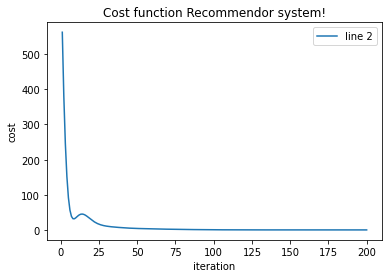

In [5]:
l=np.arange(1,len(c)+1)
plt.plot(l, c, label = "line 2")
  
# naming the x axis
plt.xlabel('iteration')
# naming the y axis
plt.ylabel('cost')
# giving a title to my graph
plt.title('Cost function Recommendor system!')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()